In [1]:
import graphlab                            # see below for install instruction
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices

In [2]:
loans = graphlab.SFrame('lending-club-data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to oaabde01@louisville.edu and will expire on September 22, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\OMARAB~1\AppData\Local\Temp\graphlab_server_1477176509.log.0


In [3]:
loans.column_names()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'is_inc_v',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'not_compliant',
 'status',
 'inactive_loans',
 'bad_loans',
 'emp_length_num',
 'grade_num',
 'sub_grade_num',
 'delinq_2yrs_zero',
 'pub_rec

In [4]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

In [5]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [6]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print 'Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows)

Dropping 29 observations; keeping 122578 


In [7]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset :", len(loans_data)

Percentage of safe loans                 : 0.502247166849
Percentage of risky loans                : 0.497752833151
Total number of loans in our new dataset : 46503


In [8]:
loans_data = risky_loans.append(safe_loans)

categorical_variables = []
for feat_name, feat_type in zip(loans_data.column_names(), loans_data.column_types()):
    if feat_type == str:
        categorical_variables.append(feat_name)

for feature in categorical_variables:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)

    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

loans_data.column_names()

['safe_loans',
 'sub_grade_num',
 'short_emp',
 'emp_length_num',
 'dti',
 'payment_inc_ratio',
 'delinq_2yrs',
 'delinq_2yrs_zero',
 'inq_last_6mths',
 'last_delinq_none',
 'last_major_derog_none',
 'open_acc',
 'pub_rec',
 'pub_rec_zero',
 'revol_util',
 'total_rec_late_fee',
 'int_rate',
 'total_rec_int',
 'annual_inc',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'grade.A',
 'grade.B',
 'grade.C',
 'grade.D',
 'grade.E',
 'grade.F',
 'grade.G',
 'home_ownership.MORTGAGE',
 'home_ownership.OTHER',
 'home_ownership.OWN',
 'home_ownership.RENT',
 'purpose.car',
 'purpose.credit_card',
 'purpose.debt_consolidation',
 'purpose.home_improvement',
 'purpose.house',
 'purpose.major_purchase',
 'purpose.medical',
 'purpose.moving',
 'purpose.other',
 'purpose.small_business',
 'purpose.vacation',
 'purpose.wedding']

In [9]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

In [10]:
import sklearn
import sklearn.ensemble 
import numpy

In [11]:
def get_numpy_data(data_sframe, features, output_array):
    ###data_sframe['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    ###features = ['constant'] + features
    #####output_array = data_sframe[output]
    # this will convert the SArray into a numpy array:
    output_array = output_array.to_numpy() # GraphLab Create>= 1.7!!
    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    #data_sframe.remove_column(output)
    features_sframe = data_sframe[features]
    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    features_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    
    return(features_matrix, output_array)

In [13]:
train_target_array = train_data[target]
validation_target_array = validation_data[target]
(train_feature_matrix, train_output) = get_numpy_data(train_data, target_features, train_target_array)
(validation_feature_matrix, valid_output) = get_numpy_data(validation_data, target_features, validation_target_array)

In [12]:
target_features = ['sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'dti',                       # debt to income ratio
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
            'grade.A',
            'grade.B',
            'grade.C',
            'grade.D',
            'grade.E',
            'grade.F',
            'grade.G',
            'home_ownership.MORTGAGE',
            'home_ownership.OTHER',
            'home_ownership.OWN',
            'home_ownership.RENT',
            'purpose.car',
            'purpose.credit_card',
            'purpose.debt_consolidation',
            'purpose.home_improvement',
            'purpose.house',
            'purpose.major_purchase',
            'purpose.medical',
            'purpose.moving',
            'purpose.other',
            'purpose.small_business',
            'purpose.vacation',
            'purpose.wedding',
           ]

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0,max_depth=6, random_state=0)

In [17]:
clf.fit(train_feature_matrix,train_output)

GradientBoostingClassifier(init=None, learning_rate=1.0, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=0, subsample=1.0, verbose=0, warm_start=False)

In [18]:
model_5 = clf

In [19]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

Columns:
	safe_loans	int
	sub_grade_num	float
	short_emp	int
	emp_length_num	int
	dti	float
	payment_inc_ratio	float
	delinq_2yrs	int
	delinq_2yrs_zero	int
	inq_last_6mths	int
	last_delinq_none	int
	last_major_derog_none	int
	open_acc	int
	pub_rec	int
	pub_rec_zero	int
	revol_util	float
	total_rec_late_fee	float
	int_rate	float
	total_rec_int	float
	annual_inc	int
	funded_amnt	int
	funded_amnt_inv	int
	installment	float
	grade.A	int
	grade.B	int
	grade.C	int
	grade.D	int
	grade.E	int
	grade.F	int
	grade.G	int
	home_ownership.MORTGAGE	int
	home_ownership.OTHER	int
	home_ownership.OWN	int
	home_ownership.RENT	int
	purpose.car	int
	purpose.credit_card	int
	purpose.debt_consolidation	int
	purpose.home_improvement	int
	purpose.house	int
	purpose.major_purchase	int
	purpose.medical	int
	purpose.moving	int
	purpose.other	int
	purpose.small_business	int
	purpose.vacation	int
	purpose.wedding	int

Rows: 4

Data:
+------------+---------------+-----------+----------------+-------+-------------------+
| safe_loans | sub_grade_num | short_emp | emp_length_num |  dti  | payment_inc_ratio |
+------------+---------------+-----------+----------------+-------+-------------------+
|     1      |      0.2      |     0     |       3        | 29.44 |      6.30496      |
|     1      |      0.6      |     1     |       1        | 12.19 |      13.4952      |
|     -1     |      0.4      |     0     |       3        | 13.97 |      2.96736      |
|     -1     |      1.0      |     0     |       11       | 16.33 |      1.90524      |
+------------+---------------+-----------+----------------+-------+-------------------+
+-------------+------------------+----------------+------------------+-----------------------+
| delinq_2yrs | delinq_2yrs_zero | inq_last_6mths | last_delinq_none | last_major_derog_none |
+-------------+------------------+----------------+------------------+-----------------------+
|      0      |        1         |       0        |        1         |           1           |
|      0      |        1         |       0        |        1         |           1           |
|      3      |        0         |       0        |        0         |           1           |
|      0      |        1         |       0        |        1         |           1           |
+-------------+------------------+----------------+------------------+-----------------------+
+----------+---------+--------------+------------+--------------------+----------+
| open_acc | pub_rec | pub_rec_zero | revol_util | total_rec_late_fee | int_rate |
+----------+---------+--------------+------------+--------------------+----------+
|    8     |    0    |      1       |    93.9    |        0.0         |   9.91   |
|    8     |    0    |      1       |    59.1    |        0.0         |  11.71   |
|    14    |    0    |      1       |    59.5    |        0.0         |  16.77   |
|    17    |    0    |      1       |    62.1    |        0.0         |   8.9    |
+----------+---------+--------------+------------+--------------------+----------+
+---------------+------------+-------------+-----+
| total_rec_int | annual_inc | funded_amnt | ... |
+---------------+------------+-------------+-----+
|     823.48    |   92000    |    15000    | ... |
|    1622.21    |   25000    |     8500    | ... |
|     719.11    |   50004    |     5000    | ... |
|     696.99    |   100000   |     5000    | ... |
+---------------+------------+-------------+-----+
[4 rows x 45 columns]

In [21]:
validation_target_array = sample_validation_data[target]
(sample_validation_feature_matrix, sample_valid_output) = get_numpy_data(sample_validation_data, target_features, validation_target_array)



In [85]:
model_5.score(sample_validation_feature_matrix,sample_valid_output)

0.5

In [23]:
validation_target_array

dtype: int
Rows: 4
[1L, 1L, -1L, -1L]

## Quiz problem 1: 50%

In [24]:
model_5.predict_proba(sample_validation_feature_matrix)

array([[ 0.44384207,  0.55615793],
       [ 0.588203  ,  0.411797  ],
       [ 0.61949387,  0.38050613],
       [ 0.21579974,  0.78420026]])

## Quiz problem 2: answer above

## Quiz problem 3: answer above

In [25]:
#(validation_feature_matrix, valid_output)
model_5.score(validation_feature_matrix, valid_output)

0.66760017233950886

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
predictions = model_5.predict(validation_feature_matrix)

In [29]:
tn, fp, fn, tp = confusion_matrix(valid_output, predictions).ravel()

## Quiz problems 4 and 5

In [33]:
fp

1608

In [32]:
fn

1478

## Quiz problem 6

In [36]:
cost = 10000 * 1478  + 20000 * 1608
cost

46940000

## 5% less loss and a 2,480,000 dollar loss saved.

In [57]:
predictionprobabilities = model_5.predict_proba(validation_feature_matrix)[:,1]

In [58]:
predictionprobabilities

array([ 0.38050613,  0.78420026,  0.33713852, ...,  0.43722195,
        0.19408549,  0.39598146])

In [63]:
validation_data['predictionproba'] = predictionprobabilities

In [66]:
validation_data_sorted = validation_data.sort('predictionproba',ascending =False)

In [70]:
validation_data_sorted

safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero
-1,0.4,0,11,32.19,3.97914,0,1
1,0.2,0,11,2.82,4.16171,1,0
1,0.2,0,11,4.02,5.09215,0,1
1,0.6,0,6,3.16,2.91713,0,1
1,0.6,0,4,31.46,1.56857,0,1
1,0.2,0,11,0.74,0.481601,0,1
1,0.8,0,6,9.33,3.71894,0,1
1,0.4,0,11,2.08,3.8251,0,1
1,0.8,1,1,6.53,5.20968,0,1
1,1.0,0,6,12.01,6.09502,0,1


## Quiz problem: C A B

In [71]:
validation_data_sorted_descending = validation_data.sort('predictionproba',ascending =True)

In [72]:
validation_data_sorted_descending

safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero
-1,1.0,0,2,0.87,12.8088,0,1
1,0.4,0,2,20.12,10.3484,0,1
-1,1.0,0,2,3.62,3.95203,0,1
-1,0.8,0,9,21.48,1.4309,1,0
-1,0.2,0,11,11.21,4.23624,0,1
-1,1.0,0,10,0.21,4.48174,0,1
-1,0.2,0,2,12.7,7.26133,0,1
-1,0.8,0,9,8.54,7.48113,0,1
-1,1.0,0,11,7.08,2.07171,0,1
-1,0.4,0,11,3.6,3.16053,0,1


## Effect of adding more trees to the ensemble

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
model_10 = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=6, random_state=0)
model_50 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=6, random_state=0)
model_100 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=6, random_state=0)
model_200 = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=6, random_state=0)
model_500 = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=6, random_state=0)

In [75]:
model_10.fit(train_feature_matrix,train_output)
model_50.fit(train_feature_matrix,train_output)
model_100.fit(train_feature_matrix,train_output)
model_200.fit(train_feature_matrix,train_output)
model_500.fit(train_feature_matrix,train_output)

GradientBoostingClassifier(init=None, learning_rate=1.0, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
print model_10.score(validation_feature_matrix, valid_output)
print model_50.score(validation_feature_matrix, valid_output)
print model_100.score(validation_feature_matrix, valid_output)
print model_200.score(validation_feature_matrix, valid_output)
print model_500.score(validation_feature_matrix, valid_output)

0.670185264972
0.656398104265
0.64228780698
0.63657906075
0.64088754847


In [77]:
print model_10.score(train_feature_matrix, train_output)
print model_50.score(train_feature_matrix, train_output)
print model_100.score(train_feature_matrix, train_output)
print model_200.score(train_feature_matrix, train_output)
print model_500.score(train_feature_matrix, train_output)

0.718074101937
0.811064241382
0.878879067143
0.963513259357
1.0


## Printing Errors

In [78]:
print 1 - model_10.score(validation_feature_matrix, valid_output)
print 1 - model_50.score(validation_feature_matrix, valid_output)
print 1 - model_100.score(validation_feature_matrix, valid_output)
print 1 - model_200.score(validation_feature_matrix, valid_output)
print 1 - model_500.score(validation_feature_matrix, valid_output)

0.329814735028
0.343601895735
0.35771219302
0.36342093925
0.35911245153


In [79]:
train_err_10 =  1 - model_10.score(train_feature_matrix, train_output)
train_err_50 =  1 - model_50.score(train_feature_matrix, train_output)
train_err_100 =  1 - model_100.score(train_feature_matrix, train_output)
train_err_200 =  1 - model_200.score(train_feature_matrix, train_output)
train_err_500 =  1 - model_500.score(train_feature_matrix, train_output)

0.281925898063
0.188935758618
0.121120932857
0.0364867406432
0.0


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [81]:
train_err_10 =  1 - model_10.score(train_feature_matrix, train_output)
train_err_50 =  1 - model_50.score(train_feature_matrix, train_output)
train_err_100 =  1 - model_100.score(train_feature_matrix, train_output)
train_err_200 =  1 - model_200.score(train_feature_matrix, train_output)
train_err_500 =  1 - model_500.score(train_feature_matrix, train_output)
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [82]:
validation_err_10 = 1 - model_10.score(validation_feature_matrix, valid_output)
validation_err_50 = 1 - model_50.score(validation_feature_matrix, valid_output)
validation_err_100 =  1 - model_100.score(validation_feature_matrix, valid_output)
validation_err_200 = 1 - model_200.score(validation_feature_matrix, valid_output)
validation_err_500 = 1 - model_500.score(validation_feature_matrix, valid_output)
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

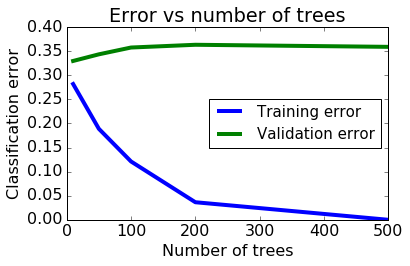

In [83]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')